In [ ]:
from google.colab import files
uploaded =files.upload()


Saving HeartDiseaseTrain-Test.csv to HeartDiseaseTrain-Test.csv


In [ ]:
from google.colab import files
import pandas as pd
import io

data = pd.read_csv(io.BytesIO(uploaded['HeartDiseaseTrain-Test.csv']))

In [ ]:
# Menampilkan 5 baris pertama
print("5 baris pertama:")
print(data.head())


5 baris pertama:
   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping                   

In [ ]:
# Menampilkan 5 baris terakhir
print("\n5 baris terakhir:")
print(data.tail())


5 baris terakhir:
      age     sex  chest_pain_type  resting_blood_pressure  cholestoral  \
1020   59    Male  Atypical angina                     140          221   
1021   60    Male   Typical angina                     125          258   
1022   47    Male   Typical angina                     110          275   
1023   50  Female   Typical angina                     110          254   
1024   54    Male   Typical angina                     120          188   

       fasting_blood_sugar               rest_ecg  Max_heart_rate  \
1020  Lower than 120 mg/ml  ST-T wave abnormality             164   
1021  Lower than 120 mg/ml                 Normal             141   
1022  Lower than 120 mg/ml                 Normal             118   
1023  Lower than 120 mg/ml                 Normal             159   
1024  Lower than 120 mg/ml  ST-T wave abnormality             113   

     exercise_induced_angina  oldpeak        slope  \
1020                     Yes      0.0  Downsloping   
1021   

In [ ]:
#	Lihat informasi tentang dataset (tipe data, jumlah entri, jumlah kolom).
#Menampilkan statistik deskriptif
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [ ]:
# Cek nilai missing (hilang)
missing_values = data.isnull().sum()
print("Nilai Missing di setiap kolom:")
print(missing_values)

Nilai Missing di setiap kolom:
age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


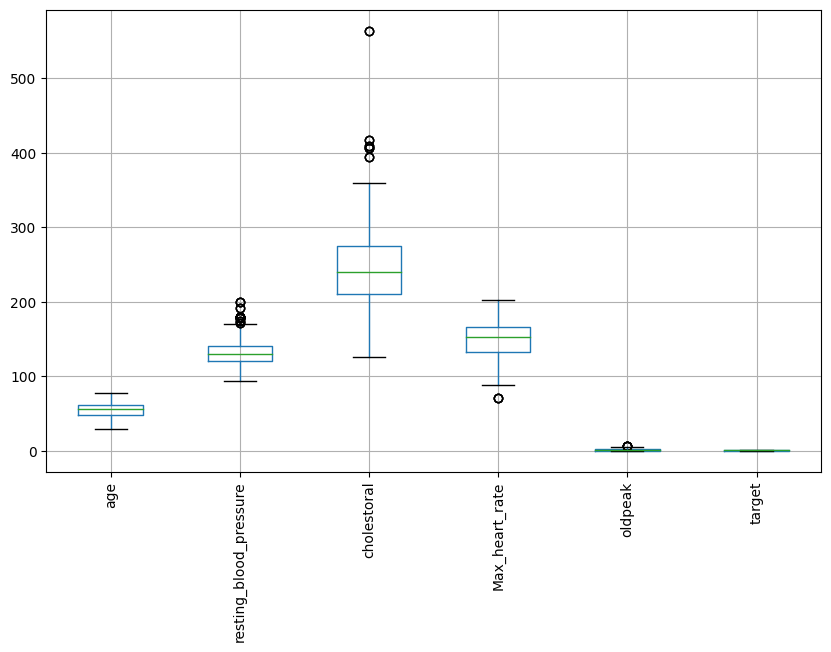

In [ ]:
import matplotlib.pyplot as plt

# Membuat boxplot untuk setiap kolom numerik
data.boxplot(figsize=(10, 6))
plt.xticks(rotation=90)

# Membuat Label kolom agar tidak bertumpuk
plt.show()

In [ ]:
# Memilih hanya kolom numerik
data_numerik = data.select_dtypes(include=[float, int])

# Menghitung  korelasi antar variabel numerik
correlation_matrix = data_numerik.corr()

# Menampilkan matriks korelasi
print("Matriks Korelasi:")
print(correlation_matrix)


Matriks Korelasi:
                             age  resting_blood_pressure  cholestoral  \
age                     1.000000                0.271121     0.219823   
resting_blood_pressure  0.271121                1.000000     0.127977   
cholestoral             0.219823                0.127977     1.000000   
Max_heart_rate         -0.390227               -0.039264    -0.021772   
oldpeak                 0.208137                0.187434     0.064880   
target                 -0.229324               -0.138772    -0.099966   

                        Max_heart_rate   oldpeak    target  
age                          -0.390227  0.208137 -0.229324  
resting_blood_pressure       -0.039264  0.187434 -0.138772  
cholestoral                  -0.021772  0.064880 -0.099966  
Max_heart_rate                1.000000 -0.349796  0.422895  
oldpeak                      -0.349796  1.000000 -0.438441  
target                        0.422895 -0.438441  1.000000  


In [ ]:
#mengitung dan menampilkan mean, median, mode, standar deviasi, variansi, skewness, dan kurtosis untuk kolom numerik.
import pandas as pd
import numpy as np

# Memilih hanya kolom numerik
data_numeric = data.select_dtypes(include=[np.number])

# Menghitung statistik dasar untuk setiap kolom numerik
mean_values = data_numeric.mean()                      # Mean
median_values = data_numeric.median()                  # Median
mode_values = data_numeric.mode().iloc[0]              # Mode (hanya mengambil mode pertama jika ada beberapa)
std_dev_values = data_numeric.std()                    # Standar Deviasi
variance_values = data_numeric.var()                   # Variansi
skewness_values = data_numeric.skew()                  # Skewness
kurtosis_values = data_numeric.kurt()                  # kurtosis

# Menampilkan hasil
print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values)
print("\nStandar Deviasi:\n", std_dev_values)
print("\nVariansi:\n", variance_values)
print("\nSkewness:\n", skewness_values)
print("\nKurtosis:\n", kurtosis_values)

Mean:
 age                        54.434146
resting_blood_pressure    131.611707
cholestoral               246.000000
Max_heart_rate            149.114146
oldpeak                     1.071512
target                      0.513171
dtype: float64

Median:
 age                        56.0
resting_blood_pressure    130.0
cholestoral               240.0
Max_heart_rate            152.0
oldpeak                     0.8
target                      1.0
dtype: float64

Mode:
 age                        58.0
resting_blood_pressure    120.0
cholestoral               204.0
Max_heart_rate            162.0
oldpeak                     0.0
target                      1.0
Name: 0, dtype: float64

Standar Deviasi:
 age                        9.072290
resting_blood_pressure    17.516718
cholestoral               51.592510
Max_heart_rate            23.005724
oldpeak                    1.175053
target                     0.500070
dtype: float64

Variansi:
 age                         82.306450
resting_blood_p

In [ ]:
print ("laporan")

laporan


data yang dimuat disini adalah kumpulan data penyakit jantung, dari 5 baris data pertama resting blood pressure yang paling tinggi dimiliki oleh seorang pria dengan resting blood pressure 148, kemudian dari 5 baris data pertama ininjuga didapatkan yang memiliki kolesterol paling tinggi yaitu seorang wanita berusia 62 tahun dengan kolesterolnya yaitu 294.

dan dari 5 baris terakhir resting blood pressure tertinggi dimiliki oleh seorang pria berumur 59 dengan resting blood pressure nya 140, dan yang memiliki kolesterol tertinggi yaitu seorang pria berumur 47 tahun dengan kolesterol nya 275.

kemudian pada bagian matriks korelasi:

Matriks korelasi ini menunjukkan bagaimana setiap variabel dalam dataset saling berhubungan satu sama lain. Korelasi mengukur sejauh mana dua variabel berubah bersama-sama. Nilai korelasi berkisar antara -1 dan 1, di mana:

"1" menunjukkan korelasi positif sempurna: ketika satu variabel meningkat, yang lain juga meningkat.

"-1" menunjukkan korelasi negatif sempurna: ketika satu variabel meningkat, yang lain menurun.

"0" menunjukkan tidak ada hubungan linier antara dua variabel.

berikut beberapa korelasi penting dari matriks ini:

age dan Max_heart_rate (-0.390227): Terdapat korelasi negatif sedang antara usia dan detak jantung maksimum. Artinya, semakin tua seseorang, semakin rendah detak jantung maksimum yang mereka capai. Hal ini sesuai dengan pengetahuan medis bahwa detak jantung maksimum cenderung menurun seiring bertambahnya usia.

age dan oldpeak (0.208137): Korelasi positif lemah menunjukkan bahwa seiring bertambahnya usia, tingkat depresi ST (oldpeak) sedikit meningkat.

age dan target (-0.229324): Korelasi negatif lemah antara usia dan label target, yang menunjukkan bahwa usia yang lebih tua sedikit menurunkan kemungkinan memiliki penyakit jantung, berdasarkan model ini.

Max_heart_rate dan target (0.422895): Korelasi positif ini cukup signifikan, menunjukkan bahwa detak jantung maksimum yang lebih tinggi berhubungan dengan peningkatan risiko penyakit jantung
